In [1]:
import pandas as pd
import pyreadstat
import os
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import datetime

In [2]:
political_survey_list = os.listdir(r'D:/Pew_research_center/raw/political/')                     

In [3]:
extreme_df = pd.DataFrame(index=[item[:-4] for item in political_survey_list], columns=['extreme_ratio', 'extreme_right_ratio', 'extreme_left_ratio'])
df_list = []
for f in political_survey_list:
    filename = r'D:\\Pew_research_center\\raw/political\\' + f
    df, meta = pyreadstat.read_sav(filename)
    if 'ideo' not in df.columns:
        df_list.append(df)
        continue
    else:
        extreme = len(df[(df.ideo == 1) | (df.ideo == 5)]) / len(df)
        extreme_right = len(df[(df.ideo == 1)]) / len(df[(df.ideo == 1) | (df.ideo == 2)])
        extreme_left = len(df[(df.ideo == 5)]) / len(df[(df.ideo == 4) | (df.ideo == 5)])
        extreme_df.loc[f[:-4], :] = [extreme, extreme_right, extreme_left]
        df_list.append(df)

In [2]:
US_list = os.listdir(r'D:/Pew_research_center/raw/US_trend/') 
extreme_US_df = pd.DataFrame(index=[item[:-4] for item in US_list], columns=['extreme_ratio', 'extreme_right_ratio', 'extreme_left_ratio'])
df_list_US = []
for f in US_list:
    filename = r'D:\\Pew_research_center\\raw\\US_trend\\' + f
    df, meta = pyreadstat.read_sav(filename)
    if 'F_IDEO_FINAL' not in df.columns:
        df_list_US.append(df)
        continue
    else:
        extreme = len(df[(df.F_IDEO_FINAL == 1) | (df.F_IDEO_FINAL == 5)]) / len(df)
        extreme_right = len(df[(df.F_IDEO_FINAL == 1)]) / len(df[(df.F_IDEO_FINAL == 1) | (df.F_IDEO_FINAL == 2)])
        extreme_left = len(df[(df.F_IDEO_FINAL == 5)]) / len(df[(df.F_IDEO_FINAL == 4) | (df.F_IDEO_FINAL == 5)])
        extreme_US_df.loc[f[:-4], :] = [extreme, extreme_right, extreme_left]
        df_list_US.append(df)

In [212]:
def plot_time_series(df, series_type, plot_title):
#     plt.figure(figsize=(30,30))
    df = df.sort_index()
    df.index = pd.to_datetime(df.index)
    min_date = df.index[0]
    ax = sns.regplot(x=[(time - min_date).total_seconds()/(60*60*24) for time in df.index], y=df[series_type].astype(np.float64))
    xticks = ax.get_xticks()
    xticks_dates = [(min_date + datetime.timedelta(days=x)).date() for x in xticks]
    ax.set_xticklabels(xticks_dates)
    ax.set(xlabel='Time', ylabel=series_type)
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    
    plt.show()

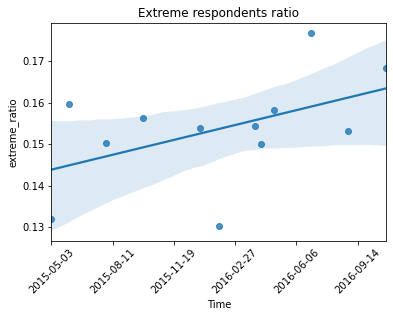

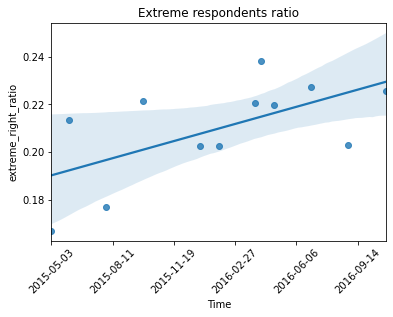

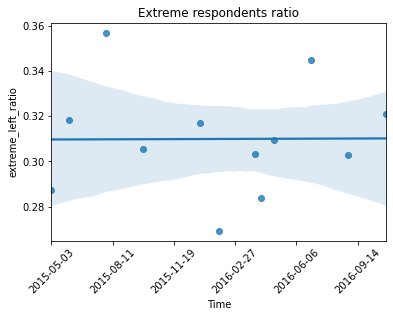

In [216]:
for col in extreme_US_df:
    plot_time_series(extreme_df, col, 'Extreme respondents ratio')

In [4]:
social_media_df = df_list_US[1]

In [25]:
social_media_col = [col for col in social_media_df.columns if 'SNS2' in col and col != 'SNS2_W14']
participation_type = ['Post articles', 'Post thoughts', 'Encourage participation', 'Encourage voting', 'Repost contents', 'Like or promote issues', 'Change profile picture', 'Contact']
participation_list = []
for par, col in zip(participation_type, social_media_col):
    ratio = len(social_media_df[social_media_df[col] == 1])/len(social_media_df)
    participation_list.append([par, ratio])
    
paticipation_df = pd.DataFrame(np.stack(participation_list), columns=['participation_type', 'Ratio'])

In [30]:
def plot_ratio(df, plot_title, y_min, y_max):
    df = df.sort_values(by='Ratio').reset_index(drop=True)
    ax = sns.barplot(x=df.participation_type, y=df.Ratio, palette='Blues')
    ax.set(xlabel="Participation_type", ylabel='Ratio')
    ax.set_title(plot_title)
    for p in ax.patches:
        ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
 textcoords='offset points')
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.set_ylim(y_min, y_max)
    plt.show()

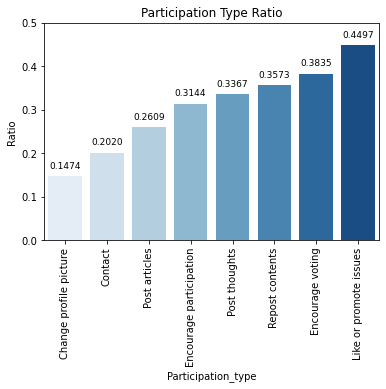

In [31]:
plot_ratio(paticipation_df, 'Participation Type Ratio', y_min=0, y_max=0.5)

In [110]:
social_media_usage_list = []
social_media_usage_col = [col for col in social_media_df.columns if 'SNSELECT' in col]
media_type = ['Facebook', 'Twitter', 'Google Plus', 'LinkedIn', 'Instagram', 'Vine', 'Tumblr', 'YouTube', 'Reddit', 'Snapchat']
for media, col in zip(media_type, social_media_usage_col):
    df = social_media_df[social_media_df[col].notnull()]
    usage = len(df[df[col] == 1])/len(df)
    social_media_usage_list.append([media, usage])
    
social_media_usage_df = pd.DataFrame(np.stack(social_media_usage_list), columns=['media_type', 'usage'])

In [138]:
def plot_usage(df, plot_title, y_min, y_max):
    df = df.sort_values(by='usage').reset_index(drop=True)
    ax = sns.barplot(x=df.media_type, y=df.usage, palette='Blues')
    ax.set(xlabel="Social Media", ylabel='Usage')
    ax.set_title(plot_title)
    for p in ax.patches:
        ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
 ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
 textcoords='offset points')
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    ax.set_ylim(y_min, y_max)
    plt.show()

In [139]:
media_usage_list = []
df = social_media_df[social_media_df['LEARNELECTTOP_W14'].notnull()]
media_type = ['Facebook', 'Twitter', 'Google Plus', 'LinkedIn', 'Instagram', 'Vine', 'Tumblr', 'YouTube', 'Reddit', 'Snapchat']
for media, i in zip(media_type, [i for i in range(1, 11)]):
    usage = len(df[df['LEARNELECTTOP_W14'] == i])/len(df)
    media_usage_list.append([media, usage])
    
media_usage_df = pd.DataFrame(np.stack(media_usage_list), columns=['media_type', 'usage'])
media_usage_df['usage'] = media_usage_df['usage'].astype(np.float64)
# media_usage_df['usage'] = (media_usage_df['usage'] - media_usage_df['usage'].mean())/media_usage_df['usage'].std()

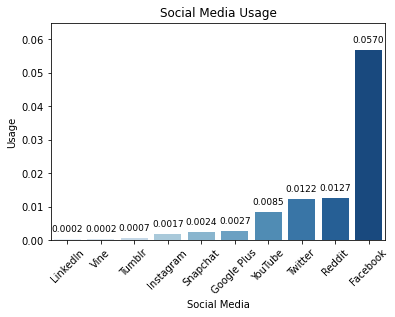

In [140]:
plot_usage(media_usage_df, 'Social Media Usage', y_min=0, y_max=0.065)